In [1]:
# ファイルの先頭 10 行をテキストとして表示
with open("parts_cost.csv", "r", encoding="utf-8") as f:
    for i, line in enumerate(f):
        print(line.strip())
        if i >= 9:
            break


item,category,price_yen
LED_strip,lighting,1200
PLA_filament,material,2500
Adapter,electronics,800
Switch,electronics,500
Frame,structure,1500



▼ 読み込んだデータ
           item     category  price_yen
0     LED_strip     lighting       1200
1  PLA_filament     material       2500
2       Adapter  electronics        800
3        Switch  electronics        500
4         Frame    structure       1500


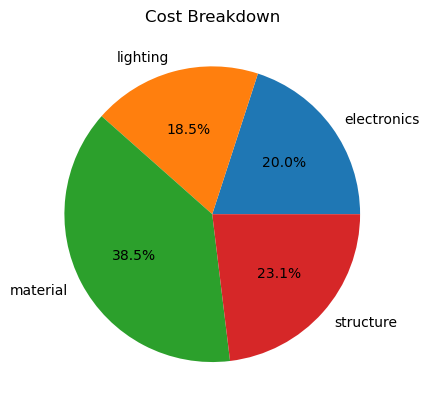

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 読み込み
df = pd.read_csv("parts_cost.csv")
print("▼ 読み込んだデータ")
print(df)

# カテゴリ別合計を円グラフで表示
df.groupby("category")["price_yen"].sum().plot.pie(autopct="%1.1f%%")
plt.title("Cost Breakdown")
plt.ylabel("")
plt.show()


           item     category  price_yen
0     LED_strip     lighting       1200
1  PLA_filament     material       2500
2       Adapter  electronics        800
3        Switch  electronics        500
4         Frame    structure       1500
5      Heatsink  electronics        600
6    Lens_cover     lighting        300


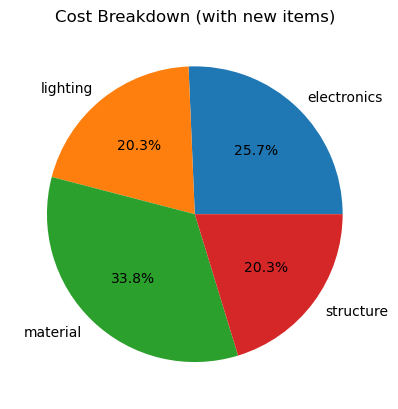

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 新しい行のリストはそのまま
new_rows = [
    {"item": "Heatsink",   "category": "electronics", "price_yen": 600},
    {"item": "Lens_cover", "category": "lighting",    "price_yen": 300},
]

# pd.concat で DataFrame 同士を結合
df2 = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)

# 確認
print(df2)

# 再集計・円グラフ
df2.groupby("category")["price_yen"].sum() \
   .plot.pie(autopct="%1.1f%%")
plt.title("Cost Breakdown (with new items)")
plt.ylabel("")
plt.show()


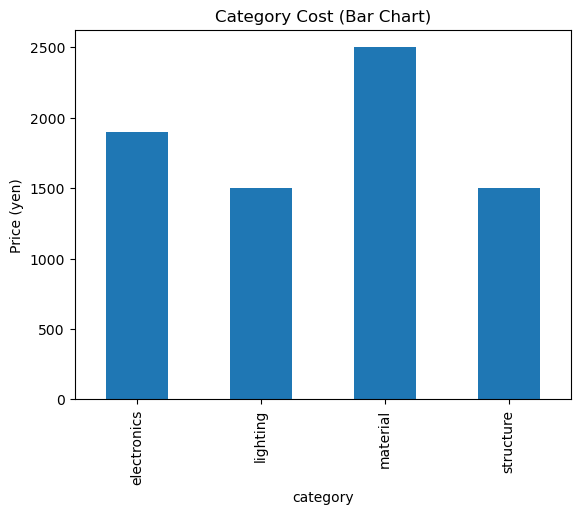

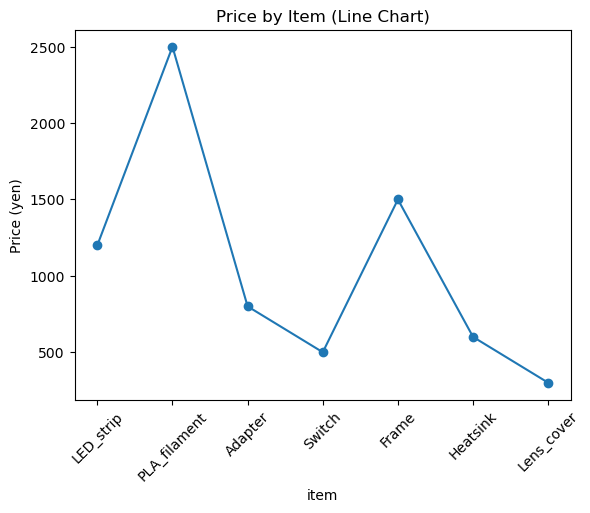

In [9]:
import matplotlib.pyplot as plt

# 棒グラフでカテゴリ別合計
cat_sum = df2.groupby("category")["price_yen"].sum()
cat_sum.plot.bar()
plt.title("Category Cost (Bar Chart)")
plt.ylabel("Price (yen)")
plt.show()

# 折れ線グラフでアイテム順の価格推移
df2.set_index("item")["price_yen"].plot.line(marker="o")
plt.title("Price by Item (Line Chart)")
plt.ylabel("Price (yen)")
plt.xticks(rotation=45)
plt.show()


High-cost items:
            item   category  price_yen
0     LED_strip   lighting       1200
1  PLA_filament   material       2500
4         Frame  structure       1500


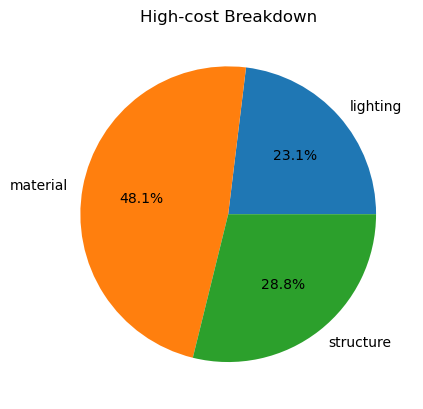

In [11]:
import matplotlib.pyplot as plt

# 価格が 1,000 円以上のアイテムだけ抽出
high = df2[df2["price_yen"] >= 1000]
print("High-cost items:\n", high)

# フィルター後の円グラフ
high.groupby("category")["price_yen"].sum() \
    .plot.pie(autopct="%1.1f%%")
plt.title("High-cost Breakdown")
plt.ylabel("")
plt.show()
